# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/Users/olesialev/Downloads/data:/yulu_bike_sharing_dataset.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [10]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

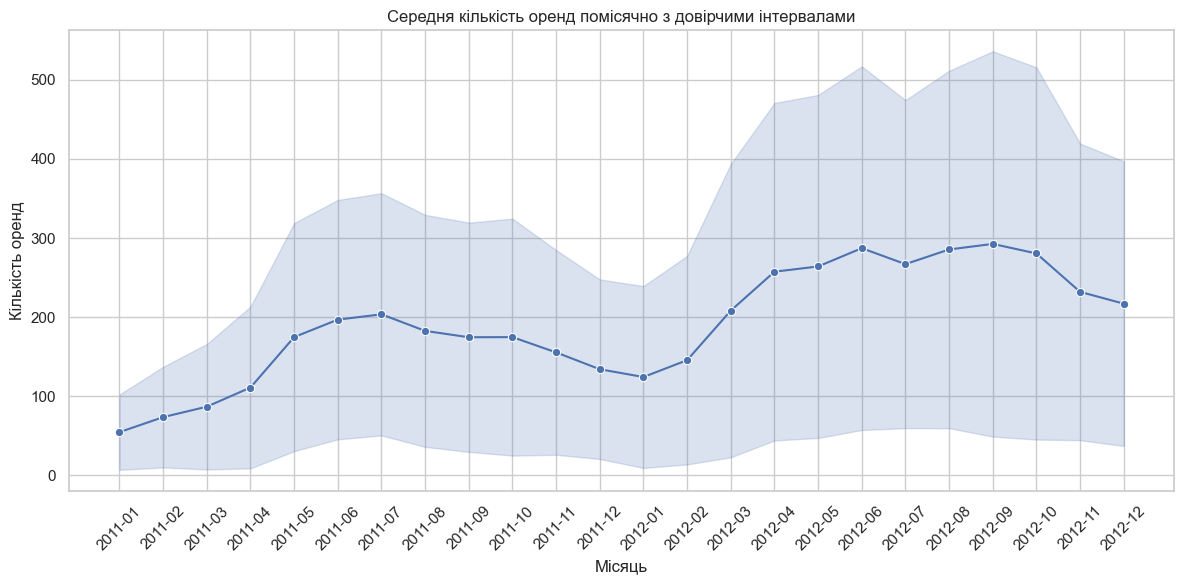

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='month_year', y='count', errorbar='sd', marker='o')
plt.title('Середня кількість оренд помісячно з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

У червні, вересні та жовтні спостерігаємо значні коливання в кількості оренд або меншу передбачуваність даних у цей час, бо довірчий інтервал має найбільший вертикальний розмах.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

In [17]:
bins_num = 25

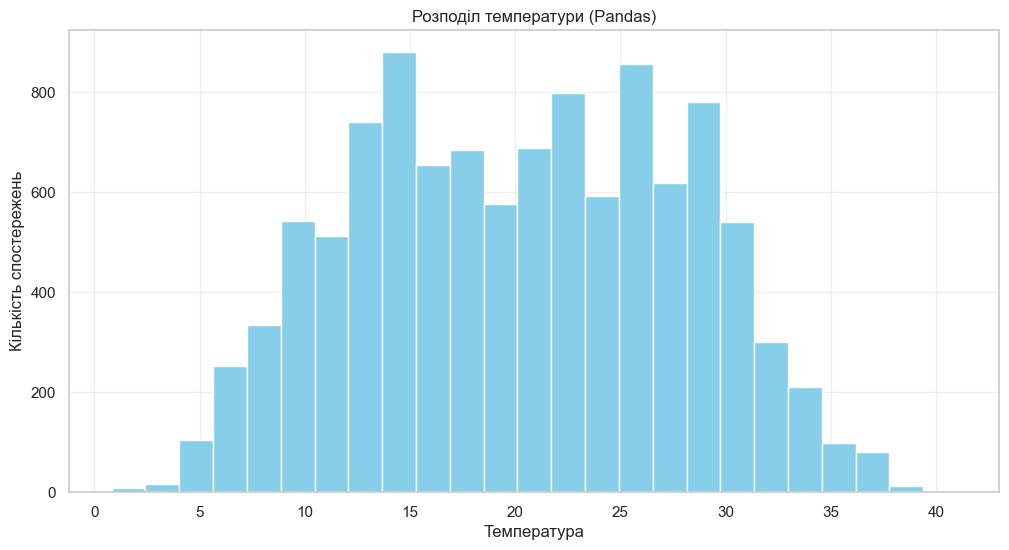

In [18]:
plt.figure(figsize=(12, 6))
df['temp'].plot.hist(
    bins=bins_num,
    color='skyblue',
)
plt.title('Розподіл температури (Pandas)')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.grid(True, alpha=0.3)
plt.show()

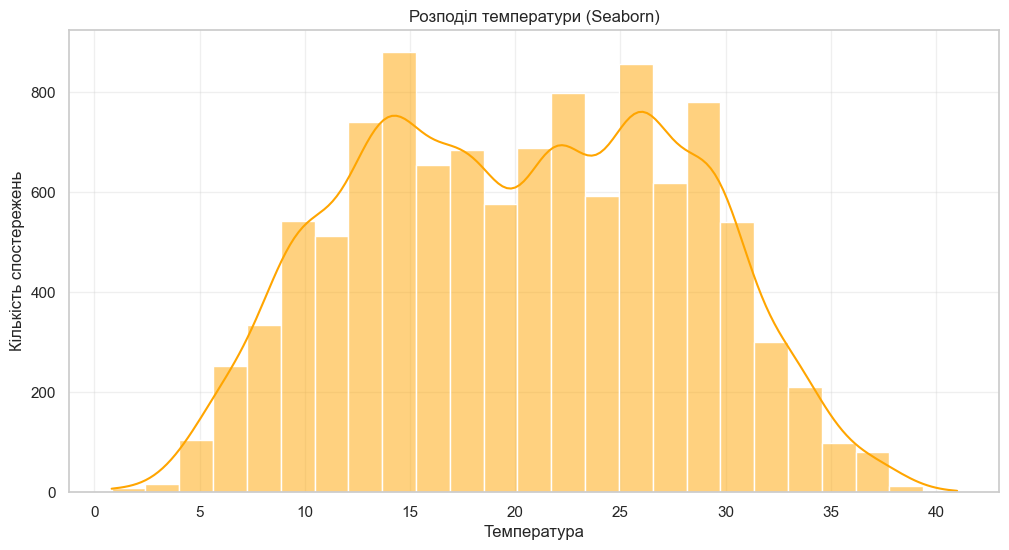

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='temp',
    bins=bins_num,
    kde=True,
    color='orange'
)
plt.title('Розподіл температури (Seaborn)')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.grid(True, alpha=0.3)
plt.show()

1. візуальної різниці між вома графіками практично нема.
2. Ця лінія щільності розподілу дає більш згладжене представлення розподілу даних, що є більш корисним для виявлення тенденцій, які можуть бути не одразу очевидними на гістограмі.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

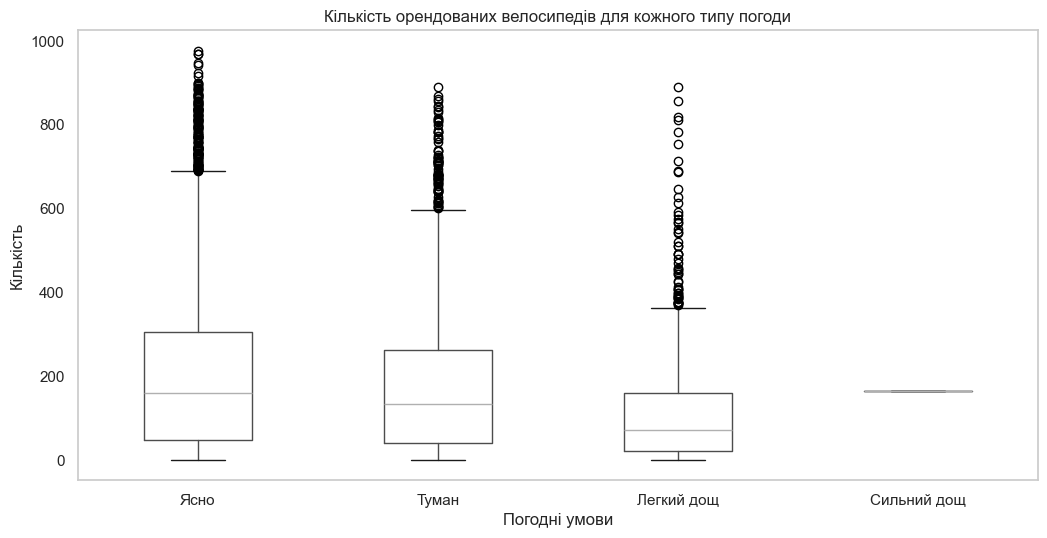

In [37]:
ax=df.boxplot(
    column='count',
    by='weather',
    figsize=(12, 6),
    grid = False
)
plt.title('Кількість орендованих велосипедів для кожного типу погоди')
plt.suptitle('')  
plt.xlabel('Погодні умови')
plt.ylabel('Кількість')
ax.set_xticklabels(['Ясно',
    'Туман',
    'Легкий дощ',
    'Сильний дощ'])
plt.show()

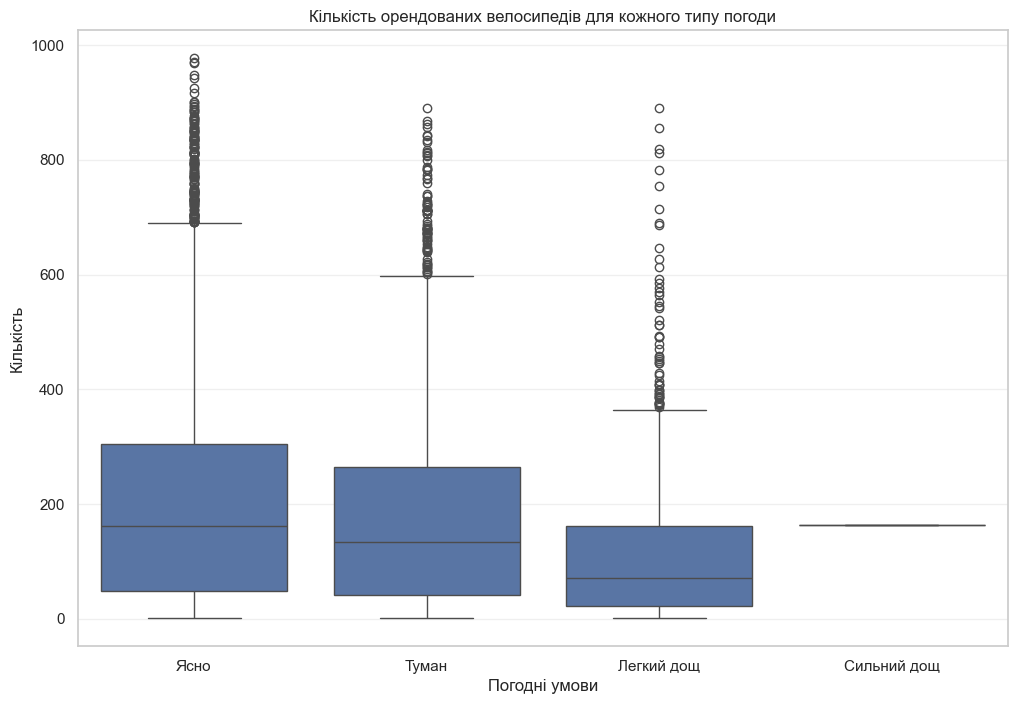

In [34]:
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=df,
    x='weather',
    y='count'
)
plt.title('Кількість орендованих велосипедів для кожного типу погоди')
plt.suptitle('')  
plt.xlabel('Погодні умови')
plt.ylabel('Кількість')
weather_labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=weather_labels
)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

Box plot, який я побудувала за допомогою Pandas, є простим та інформативним для базового аналізу розподілу даних. У той час, візуалізація Seaborn виглядає більш охайною та привабливою завдяки кращому стилю та кольору. Для презентацій і фінальних звітів Seaborn є більш доречним інструментом.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [57]:
correlation = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

In [58]:
correlation

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


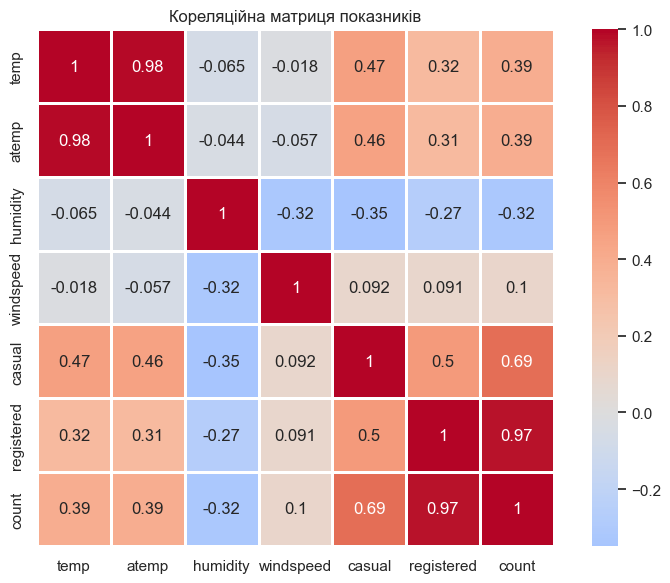

In [60]:
plt.figure(figsize=(8, 6))

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1
            )

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

1. Найсильніший зв'язок із показником count мають registered (0.97): Маємо іделаьну позитивну кореляцію. Вона пояснюється тим, що зареєстровані користувачі складають переважну більшість від загальної кількості оренд.
-casual (0.69): Також сильна позитивна кореляція. Оскільки count = registered + casual, ці дві змінні математично визначають загальний показник.
-temp та atemp (0.39): Серед факторів навколишнього середовища саме температура має найбільш помітний позитивний вплив на кількість оренд.
2. Між temp та atemp спостерігається надзвичайно висока кореляція 0.98.
3. Вологість має негативний зв'язок майже з усіма іншими показниками:
Найсильніший негативний зв'язок із casual (-0.35) та count (-0.32). Це означає, що зі збільшенням вологості (наприклад, перед дощем або у дуже задушливу погоду) кількість бажаючих орендувати велосипед зменшується.
Також негативно корелює з вітром windspeed (-0.32) та температурою.
Швидкість вітру (windspeed) має дуже слабку негативну кореляцію з температурою: temp (-0.018) та atemp (-0.057).

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


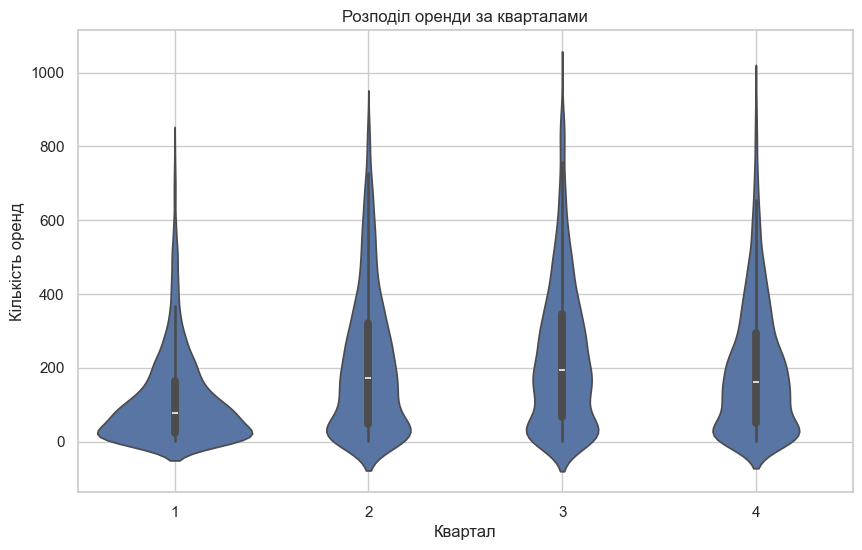

In [70]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='season', y='count')

plt.title('Розподіл оренди за кварталами')
plt.xlabel('Квартал')
plt.ylabel('Кількість оренд')
plt.grid(True)

plt.show()


1. Показує щільність розподілу даних. І означає, що у діапазоні значень "кількість оренд" знаходиться найбільше спостережень.
2. Найбільша варіабельність спостерігається у 3-му кварталі.
3. Показує повну форму розподілу даних, а не лише статистичні показники (медіану, квартилі).

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

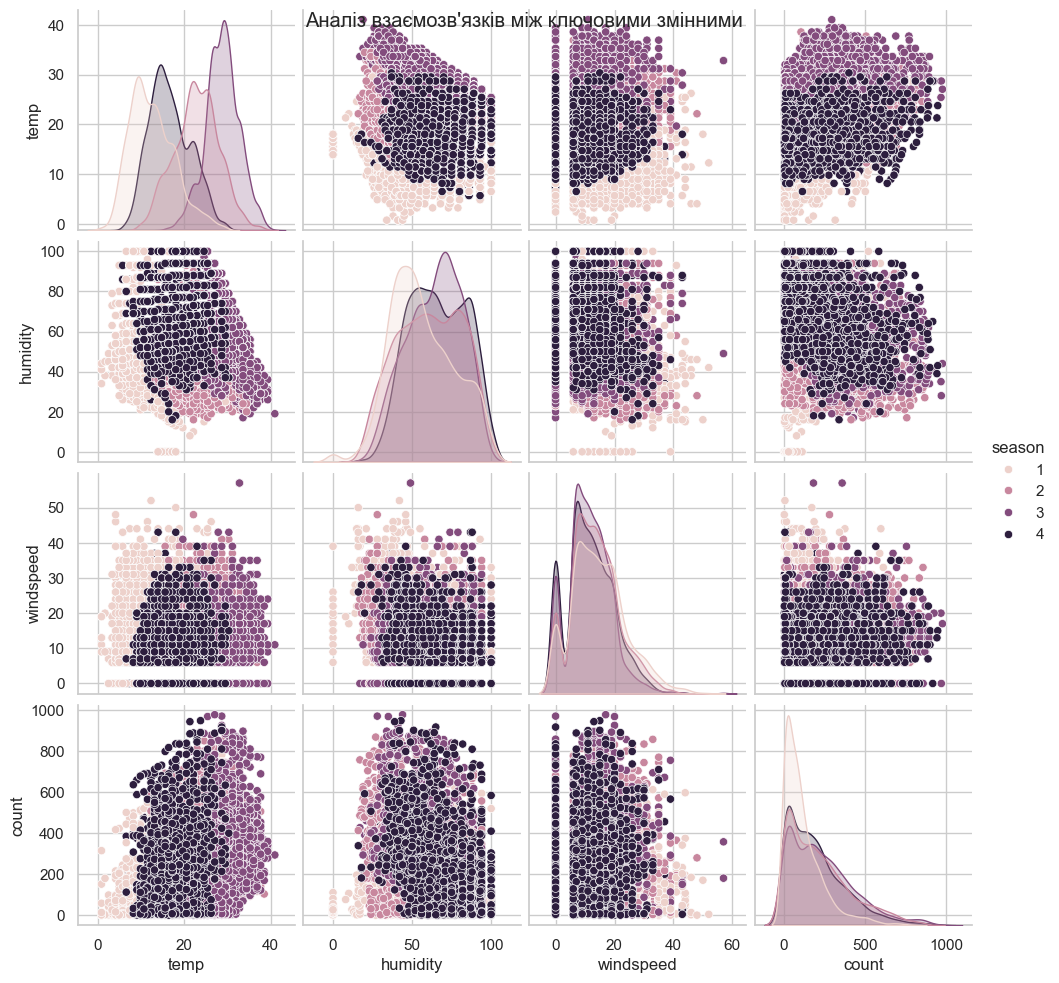

In [79]:
columns = ['temp', 'humidity', 'windspeed', 'count', 'season']
sns.pairplot(df[columns], hue='season')
plt.suptitle("Аналіз взаємозв'язків між ключовими змінними")
plt.show()

1. Бачимо, що між count і temp найсфльніший лінійний зв'язок, позитивна кореляція, тобто чим вища температура, тим більше оренд.
2. temp і count. До прикладу, Перший квартал суттєво відрізняється від інших за кількістю оренд - він має найнижчі показники та найбільшу концентрацію значень біля нуля. У той час як другий та третій квартали мають значно ширші розподіли з вищими медіанами.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

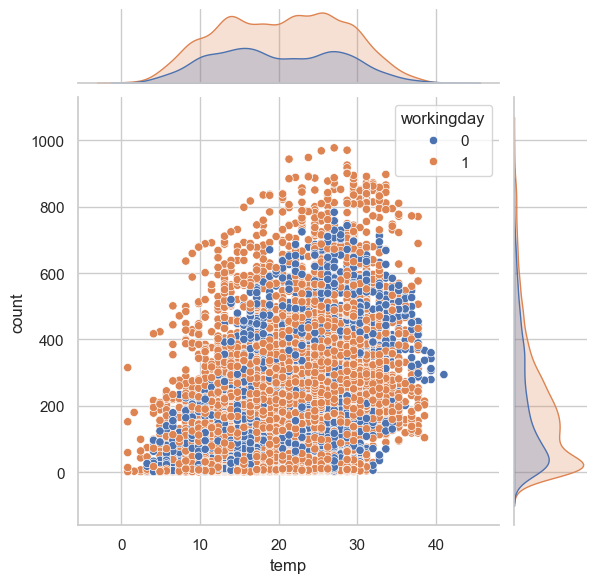

In [80]:
sns.jointplot(data=df, x="temp", y="count", hue="workingday");

1.Верхній графік: Показує розподіл температури окремо для робочих та вихідних днів (синій колір). Ми бачимо, що температурні умови в обох категоріях днів майже ідентичні (криві практично накладаються).
Правий графік: Показує розподіл кількості оренд. Він дозволяє побачити, яка кількість оренд зустрічається найчастіше. Можна помітити, що щільність розподілу для робочих днів та вихідних дещо відрізняється за формою, хоча загальні діапазони схожі.

2.Обидві групи користувачів демонструють схожу позитивну залежність від температури, за якої кількість оренд стабільно зростає разом із потеплінням. При цьому робочі дні вирізняються більш щільною концентрацією та стабільністю попиту на оренду, тоді як у неробочі дні спостерігаються специфічні піки, що вказують на прогулянковий характер використання велосипедів.